In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error
import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from statsmodels.nonparametric.smoothers_lowess import lowess


In [6]:
df = pd.read_excel('Chen.xlsx') 
df = df[df['Surface lake summer temperature (SLST) (°C) (Bernasconi et al., 2018)'].notna()]
df = df.sort_values('Age (Ma)', ascending=True)
lat = df['Latitude']
lat = 35.65
df

,Sample Number,Age (Ma),Replicates for clumped isotope analysis,Δ47,1 s.e.,"Surface lake summer temperature (SLST) (°C) (Bernasconi et al., 2018)",1 s.e..1,Latitude
0,16KL20,0.864768,4,0.747000,0.016000,5.162788,3.839528,35.65
1,16KL15,0.885238,5,0.733000,0.002082,8.506224,0.517004,35.65
2,16KL05,0.922083,8,0.690333,0.012979,19.893513,3.597298,35.65
3,16KL69,1.377170,6,0.699667,0.010138,17.260970,2.755357,35.65
4,16KL64,1.475116,5,0.761667,0.006692,1.656659,1.533769,35.65
5,16KL50,1.612240,4,0.743333,0.014993,6.110543,3.673879,35.65
6,16KL44,1.690597,6,0.729333,0.015452,9.578920,3.855727,35.65
7,16KL24,1.946954,7,0.775000,0.007234,-1.369934,1.620156,35.65
8,16KL159,1.959638,13,0.686500,0.004500,20.846808,1.273350,35.65
9,16KL152,2.030670,17,0.729667,0.007965,9.379325,2.018392,35.65


In [7]:
df_pollen = pd.read_excel('/Users/alexaterrazas/Downloads/Schwarz.xlsx', sheet_name = 1) 

df_pollen['Symmetric Error'] = (df_pollen['MAT max'] - df_pollen['MAT min']) / 2

pollen_mpwp = df_pollen[(df_pollen['Age (Ma)'] > 3) & (df_pollen['Age (Ma)'] < 3.3)]

pollen_mean = pollen_mpwp['MAT best'].mean()


In [8]:
def TF1_jja(Tw):
    MAAT = (1.2814 * Tw) - 18.4154
    return MAAT

In [9]:
def TF2_jja(Tw):
    MAAT = (0.0032 * np.power(Tw, 2)) + (1.1639 * Tw) - 17.5319
    return MAAT

In [10]:
def TF3_jja(Tw, lat):
    MAAT = (-0.0015 * np.power(Tw, 2)) + (0.9189 * Tw)  - (0.2738 * lat) + 1.4836
    return MAAT


In [11]:
def TF4_jja(Tw, lat, elev):
    MAAT =  (-0.0043 * np.power(Tw, 2)) + (0.7775 * Tw) - (0.3937 * lat) - (2.3094 * elev) + 12.0188
    return MAAT

In [12]:
def HS_jja(Tw):
    MAAT_jja = (-0.0055)*np.power(Tw,2) + (1.476 * Tw) - 18.915
   
    return MAAT_jja

In [13]:
def MAAT_error_HS_jja(Tw_error):
    quadrature = np.sqrt((Tw_error**2) + (5.43**2))
    return quadrature

In [14]:
def MAAT_error_TF1_jja(Tw_error):
    quadrature = np.sqrt((Tw_error**2) + (5**2))
    return quadrature

In [15]:
def MAAT_error_TF2_jja(Tw_error):
    quadrature = np.sqrt((Tw_error**2) + (5**2))
    return quadrature

In [16]:
def MAAT_error_TF3_jja(Tw_error):
    quadrature = np.sqrt((Tw_error**2) + (3.7**2))
    return quadrature

In [17]:
def MAAT_error_TF4_jja(Tw_error):
    quadrature = np.sqrt((Tw_error**2) + (3**2))
    return quadrature

In [18]:
Tw_error = df['1 s.e..1']

df['HS_MAAT_error'] = MAAT_error_HS_jja(Tw_error)
df['TF4_MAAT_error'] = MAAT_error_TF4_jja(Tw_error)
df['TF3_MAAT_error'] = MAAT_error_TF3_jja(Tw_error)
df['TF2_MAAT_error'] = MAAT_error_TF2_jja(Tw_error)
df['TF1_MAAT_error'] = MAAT_error_TF1_jja(Tw_error)

In [19]:
df['TF4_MAAT'] = TF4_jja(df['Surface lake summer temperature (SLST) (°C) (Bernasconi et al., 2018)'], lat, 4.7)
df['TF3_MAAT'] = TF3_jja(df['Surface lake summer temperature (SLST) (°C) (Bernasconi et al., 2018)'], lat)
df['TF2_MAAT'] = TF2_jja(df['Surface lake summer temperature (SLST) (°C) (Bernasconi et al., 2018)'])
df['TF1_MAAT'] = TF1_jja(df['Surface lake summer temperature (SLST) (°C) (Bernasconi et al., 2018)'])

df['HS_MAAT'] = HS_jja(df['Surface lake summer temperature (SLST) (°C) (Bernasconi et al., 2018)'])

In [20]:
df_mpwp = df[(df['Age (Ma)'] > 3) & (df['Age (Ma)'] < 3.3)]
df_mpwp.to_csv('kunlun_pass_mpwp.csv')
df_mpwp

,Sample Number,Age (Ma),Replicates for clumped isotope analysis,Δ47,1 s.e.,"Surface lake summer temperature (SLST) (°C) (Bernasconi et al., 2018)",1 s.e..1,Latitude,HS_MAAT_error,TF4_MAAT_error,TF3_MAAT_error,TF2_MAAT_error,TF1_MAAT_error,TF4_MAAT,TF3_MAAT,TF2_MAAT,TF1_MAAT,HS_MAAT
30,16KL180,3.096151,7,0.699333,0.017525,17.506965,4.738917,35.65,7.207096,5.608684,6.012265,6.888928,6.888928,-0.577043,7.350040,3.825237,4.018025,5.239565
31,16KL178,3.120000,4,0.697667,0.008667,17.787062,2.373279,35.65,5.925990,3.825239,4.395731,5.534659,5.534659,-0.401776,7.592592,4.182876,4.376942,5.598616
32,16KL176,3.136741,6,0.738000,0.009074,7.320977,3.883151,35.65,6.675609,4.907022,5.363661,6.330787,6.330787,-7.409191,-1.630519,-8.839505,-9.034300,-8.404020
33,16KL169,3.207773,8,0.711667,0.016180,14.157215,4.284321,35.65,6.916669,5.230239,5.660866,6.584482,6.584482,-2.725385,4.431055,-0.412952,-0.274345,0.878702
34,16KL167,3.228068,6,0.730667,0.009207,9.142749,2.324893,35.65,5.906778,3.795409,4.369797,5.514084,5.514084,-6.121734,-0.001483,-6.623167,-6.699881,-5.880047


In [21]:
df_o_e = df_mpwp.copy()
df_o_e['TF4_MAAT_anom'] = df_o_e['TF4_MAAT'] - - 6.5
df_o_e['HS_MAAT_anom'] = df_o_e['HS_MAAT'] - - 6.5
df_o_e.to_csv('kunlun_pass_o_e.csv')

In [22]:
df_o_e

,Sample Number,Age (Ma),Replicates for clumped isotope analysis,Δ47,1 s.e.,"Surface lake summer temperature (SLST) (°C) (Bernasconi et al., 2018)",1 s.e..1,Latitude,HS_MAAT_error,TF4_MAAT_error,TF3_MAAT_error,TF2_MAAT_error,TF1_MAAT_error,TF4_MAAT,TF3_MAAT,TF2_MAAT,TF1_MAAT,HS_MAAT,TF4_MAAT_anom,HS_MAAT_anom
30,16KL180,3.096151,7,0.699333,0.017525,17.506965,4.738917,35.65,7.207096,5.608684,6.012265,6.888928,6.888928,-0.577043,7.350040,3.825237,4.018025,5.239565,5.922957,11.739565
31,16KL178,3.120000,4,0.697667,0.008667,17.787062,2.373279,35.65,5.925990,3.825239,4.395731,5.534659,5.534659,-0.401776,7.592592,4.182876,4.376942,5.598616,6.098224,12.098616
32,16KL176,3.136741,6,0.738000,0.009074,7.320977,3.883151,35.65,6.675609,4.907022,5.363661,6.330787,6.330787,-7.409191,-1.630519,-8.839505,-9.034300,-8.404020,-0.909191,-1.904020
33,16KL169,3.207773,8,0.711667,0.016180,14.157215,4.284321,35.65,6.916669,5.230239,5.660866,6.584482,6.584482,-2.725385,4.431055,-0.412952,-0.274345,0.878702,3.774615,7.378702
34,16KL167,3.228068,6,0.730667,0.009207,9.142749,2.324893,35.65,5.906778,3.795409,4.369797,5.514084,5.514084,-6.121734,-0.001483,-6.623167,-6.699881,-5.880047,0.378266,0.619953


In [23]:
def get_maat(df, MAAT, MAAT_err):
    MAAT_mean = np.mean(df[MAAT])
    MAAT_err = np.sqrt(np.sum(np.power(df[MAAT_err],2))/len(df[MAAT_err]))/np.sqrt(len(df[MAAT_err]))
    
    
    return MAAT_mean, MAAT_err


In [24]:
get_maat(df_mpwp, 'TF1_MAAT', 'TF1_MAAT_error')

(-1.5227118466322878, 2.7707701268556457)

In [25]:
get_maat(df_mpwp, 'TF2_MAAT', 'TF2_MAAT_error')

(-1.5735021089202461, 2.7707701268556457)

In [26]:
get_maat(df_mpwp, 'TF3_MAAT', 'TF3_MAAT_error')

(3.548336914148423, 2.327051158843666)

In [27]:
get_maat(df_mpwp, 'TF4_MAAT', 'TF4_MAAT_error')

(-3.4470259603017865, 2.1159317323287277)

In [28]:
get_maat(df_mpwp, 'HS_MAAT', 'HS_MAAT_error')

(-0.5134366590254451, 2.928164458474908)

In [29]:
def generate_lowess(MAAT):
    # Get the time series data
    age = df['Age (Ma)']
    value = df[MAAT]

    # Perform Lowess regression
    lowess_result = lowess(value, age, frac = 0.3)

    # Extract the smoothed values and residuals
    smoothed_values = lowess_result[:, 1]
    residuals = value - smoothed_values

    # Calculate 1-sigma confidence intervals
    sigma = np.std(residuals)
    lower_ci = smoothed_values - sigma
    upper_ci = smoothed_values + sigma
    
    return age, value, smoothed_values, lower_ci, upper_ci

In [30]:
age_TF4 = generate_lowess('TF4_MAAT')[0]
value_TF4 = generate_lowess('TF4_MAAT')[1]
smooth_val_TF4 = generate_lowess('TF4_MAAT')[2]
lower_ci_TF4 = generate_lowess('TF4_MAAT')[3]
upper_ci_TF4 = generate_lowess('TF4_MAAT')[4]

In [31]:
age_TF3 = generate_lowess('TF3_MAAT')[0]
value_TF3 = generate_lowess('TF3_MAAT')[1]
smooth_val_TF3 = generate_lowess('TF3_MAAT')[2]
lower_ci_TF3 = generate_lowess('TF3_MAAT')[3]
upper_ci_TF3 = generate_lowess('TF3_MAAT')[4]

In [32]:
age_TF2 = generate_lowess('TF2_MAAT')[0]
value_TF2 = generate_lowess('TF2_MAAT')[1]
smooth_val_TF2 = generate_lowess('TF2_MAAT')[2]
lower_ci_TF2 = generate_lowess('TF2_MAAT')[3]
upper_ci_TF2 = generate_lowess('TF2_MAAT')[4]

In [33]:
age_TF1 = generate_lowess('TF1_MAAT')[0]
value_TF1 = generate_lowess('TF1_MAAT')[1]
smooth_val_TF1 = generate_lowess('TF1_MAAT')[2]
lower_ci_TF1 = generate_lowess('TF1_MAAT')[3]
upper_ci_TF1 = generate_lowess('TF1_MAAT')[4]

In [34]:
age_HS = generate_lowess('HS_MAAT')[0]
value_HS = generate_lowess('HS_MAAT')[1]
smooth_val_HS = generate_lowess('HS_MAAT')[2]
lower_ci_HS = generate_lowess('HS_MAAT')[3]
upper_ci_HS = generate_lowess('HS_MAAT')[4]

In [35]:
age_Tw = generate_lowess('Surface lake summer temperature (SLST) (°C) (Bernasconi et al., 2018)')[0]
value_Tw = generate_lowess('Surface lake summer temperature (SLST) (°C) (Bernasconi et al., 2018)')[1]
smooth_val_Tw = generate_lowess('Surface lake summer temperature (SLST) (°C) (Bernasconi et al., 2018)')[2]
lower_ci_Tw = generate_lowess('Surface lake summer temperature (SLST) (°C) (Bernasconi et al., 2018)')[3]
upper_ci_Tw = generate_lowess('Surface lake summer temperature (SLST) (°C) (Bernasconi et al., 2018)')[4]

In [36]:
def generate_lowess_pollen(MAAT):
    # Get the time series data
    age = df_pollen['Age (Ma)']
    value = df_pollen[MAAT]

    # Perform Lowess regression
    lowess_result = lowess(value, age, frac = 0.05)

    # Extract the smoothed values and residuals
    smoothed_values = lowess_result[:, 1]
    residuals = value - smoothed_values

    # Calculate 1-sigma confidence intervals
    sigma = np.std(residuals)
    lower_ci = smoothed_values - sigma
    upper_ci = smoothed_values + sigma
    
    return age, value, smoothed_values, lower_ci, upper_ci

In [37]:
age_pollen = generate_lowess_pollen('MAT best')[0]
value_pollen = generate_lowess_pollen('MAT best')[1]
smooth_val_pollen = generate_lowess_pollen('MAT best')[2]
lower_ci_pollen = generate_lowess_pollen('MAT best')[3]
upper_ci_pollen = generate_lowess_pollen('MAT best')[4]

In [38]:
from matplotlib.lines import Line2D

def legend():
    

    orange = 'gray'
    green = plt.cm.tab10(3)
    purple = plt.cm.tab10(0)
#     orange = '#EC5800'
#     blue = '#40E0D0'

    ci = mpatches.Rectangle((0, 0), 1, 1, facecolor='gray', alpha = 0.4)
    line = Line2D([0], [0], color='k')
    purple = mpatches.Rectangle((0, 0), 1, 1, facecolor=purple)
    green = mpatches.Rectangle((0, 0), 1, 1, facecolor=green)
    orange = mpatches.Rectangle((0, 0), 1, 1, facecolor=orange)



    inter = Line2D([0], [0], label='manual point', marker='o', ms = 10, markeredgecolor='k', markerfacecolor= 'w', linestyle='')
#     HS_good = Line2D([0], [0], label='manual point', marker='o',  markeredgecolor='k', markerfacecolor= orange, linestyle='')
#     AT_low = Line2D([0], [0], label='manual point', marker='X', ms = 7, markeredgecolor='k', markerfacecolor= blue, linestyle='')
    extra = Line2D([0], [0], label='manual point', marker='X', ms = 12, markeredgecolor='k', markerfacecolor= 'w', linestyle='')

    #create the legend with the custom artist
    plt.legend(handles=[purple, green, orange, inter, extra, line, ci], 
                 labels=['This study: Model 2', 'This study: Model 3', 'Hren and Sheldon (2012)', 'Interpolated', 'Extrapolated', '1 Ma lowess regression', '1$\sigma$ confidence intervals'],
                 bbox_to_anchor=(0.04, 0.995), loc='upper left', borderaxespad=0, frameon=False, fontsize = 15)
    return

In [39]:
from matplotlib.lines import Line2D

def legend():
    
#     orange = '#FFAA33'
#     green = '#50C878'
#     purple ='#AF69EE'

#     orange = '#EC5800'
#     blue = '#40E0D0'

    orange = plt.cm.tab10(1)
    green = plt.cm.tab10(2)
    purple = plt.cm.tab10(4)

    inter_purp = Line2D([0], [0], label='manual point', marker='o',  markeredgecolor='k', markerfacecolor= purple, linestyle='')
    extra_purp = Line2D([0], [0], label='manual point', marker='X',  markeredgecolor='k', markerfacecolor= purple, linestyle='')
    ci_purp = mpatches.Rectangle((0, 0), 1, 1, facecolor=purple, alpha = 0.4)
    line_purp = Line2D([0], [0], color=purple)
    
    inter_green = Line2D([0], [0], label='manual point', marker='o',  markeredgecolor='k', markerfacecolor= green, linestyle='')
    extra_green = Line2D([0], [0], label='manual point', marker='X',  markeredgecolor='k', markerfacecolor= green, linestyle='')
    ci_green = mpatches.Rectangle((0, 0), 1, 1, facecolor=green, alpha = 0.4)
    line_green = Line2D([0], [0], color=green)
    
    inter_or = Line2D([0], [0], label='manual point', marker='o',  markeredgecolor='k', markerfacecolor= orange, linestyle='')
    extra_or = Line2D([0], [0], label='manual point', marker='X',  markeredgecolor='k', markerfacecolor= orange, linestyle='')
    ci_or = mpatches.Rectangle((0, 0), 1, 1, facecolor=orange, alpha = 0.4)
    line_or = Line2D([0], [0], color=orange)

#     purple = mpatches.Rectangle((0, 0), 1, 1, facecolor=purple)
#     green = mpatches.Rectangle((0, 0), 1, 1, facecolor=green)
#     orange = mpatches.Rectangle((0, 0), 1, 1, facecolor=orange)



#     HS_good = Line2D([0], [0], label='manual point', marker='o',  markeredgecolor='k', markerfacecolor= orange, linestyle='')
#     AT_low = Line2D([0], [0], label='manual point', marker='X', ms = 7, markeredgecolor='k', markerfacecolor= blue, linestyle='')
#     extra = Line2D([0], [0], label='manual point', marker='X', ms = 7, markeredgecolor='k', markerfacecolor= 'w', linestyle='')

    #create the legend with the custom artist
    plt.legend(handles=[inter_purp, extra_purp, line_purp, ci_purp,
                        inter_green, extra_green, line_green, ci_green,
                        inter_or, extra_or, line_or, ci_or
                        ], 
                 labels=['Interpolated', 'Extrapolated' , '1 Ma lowess regression', '1$\sigma$ confidence intervals',
                        '', '', '', '',
                        '', '', '', ''],
                 bbox_to_anchor=(0.9, -0.68, 0.5, 0.5), frameon=False, fontsize = 14)
    return

In [40]:
pollen_maat = get_maat(pollen_mpwp, 'MAT best', 'Symmetric Error')[0]
pollen_maat
pollen_maat_error = get_maat(pollen_mpwp, 'MAT best', 'Symmetric Error')[1]
pollen_maat_error
print(pollen_maat, pollen_maat_error)

0.564342833257348 0.2856179996501233


/var/folders/_1/xcmb4cbj6dd5wy_54lgm1nw40000gn/T/ipykernel_13825/3315202004.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


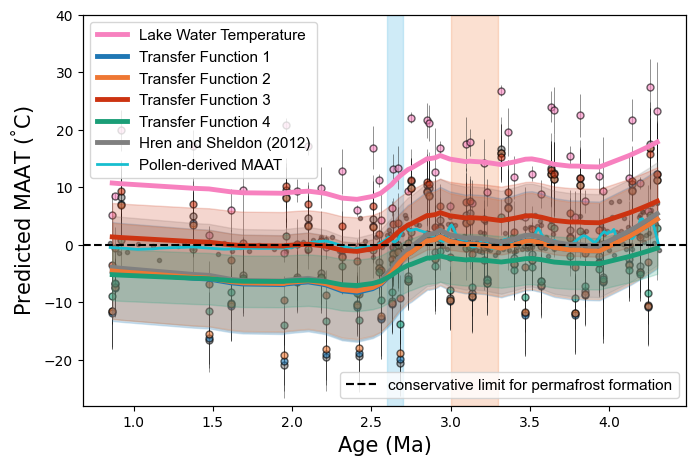

In [41]:
fs = 15
fig = plt.figure(figsize=(12.5, 5.5))
grid = plt.GridSpec(13, 32, wspace=0.2, hspace=0)

# Primary axis
ax1 = plt.subplot(grid[0:12, 0:20])

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 15

# Define colors
blue_light = '#87CEEB'
blue = plt.cm.tab10(0)
orange = '#EE7733'
red = '#CC3311'
gray = '#808080'
green = plt.cm.Dark2(0)
pink = plt.cm.Set1(7)
purple = plt.cm.tab20(18)
# Define y-limits
# common_ylim = (-20, 40)  # Adjusted to ensure both axes have the same range

# Apply y-limits to both axes
# ax1.set_ylim(common_ylim)

# # Secondary y-axis
ax1_right = ax1.twinx()
# ax1_right.set_ylim(common_ylim)  # Ensure it matches the left y-axis range
ax1_right.tick_params(axis='y', which='both', bottom=False, top=False, labelright=False)
ax1_right.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
# ax1_right.set_ylabel('Lake Water Temperature ($^\degree$C)', fontsize=fs, rotation=270, labelpad=30)

# Plot lines and confidence intervals first
ax1.plot(age_pollen, smooth_val_pollen, color=purple, linewidth=2, label='Lowess Regression', zorder=4)
ax1.fill_between(age_HS, lower_ci_HS, upper_ci_HS, alpha=0.2, color=gray, zorder=3)
ax1.plot(age_HS, smooth_val_HS, color=gray, linewidth=3.5, label='Lowess Regression', zorder=4)
ax1.fill_between(age_TF1, lower_ci_TF1, upper_ci_TF1, alpha=0.2, color=blue, zorder=3)
ax1.plot(age_TF1, smooth_val_TF1, color=blue, linewidth=3.5, label='Lowess Regression', zorder=4)
ax1.fill_between(age_TF2, lower_ci_TF2, upper_ci_TF2, alpha=0.2, color=orange, zorder=3)
ax1.plot(age_TF2, smooth_val_TF2, color=orange, linewidth=3.5, label='Lowess Regression', zorder=4)
ax1.fill_between(age_TF3, lower_ci_TF3, upper_ci_TF3, alpha=0.2, color=red, zorder=3)
ax1.plot(age_TF3, smooth_val_TF3, color=red, linewidth=3.5, label='Lowess Regression', zorder=4)
ax1.fill_between(age_TF4, lower_ci_TF4, upper_ci_TF4, alpha=0.2, color=green, zorder=3)
ax1.plot(age_TF4, smooth_val_TF4, color=green, linewidth=3.5, label='Lowess Regression', zorder=4)

ax1.plot(
    age_Tw, 
    smooth_val_Tw, 
    color=pink, 
    linewidth=3.5, 
    label='Lowess Regression (H2O Temp)', 
    zorder=4  # Higher zorder for line
)

# Plot scatter points after lines to ensure they are below
ax1.errorbar(
    df['Age (Ma)'], 
    df['Surface lake summer temperature (SLST) (°C) (Bernasconi et al., 2018)'], 
    yerr=df['1 s.e..1'],  
    marker='o', 
    c=pink, 
    ms=5, 
    mec='k', 
    ecolor='k', 
    elinewidth=0.5, 
    linestyle='none', 
    alpha=0.6, 
    zorder=2  # Lower zorder for scatter
)

ax1.scatter(df_pollen['Age (Ma)'], df_pollen['MAT best'], marker='.', color='k', alpha=0.45, zorder=2)
ax1.errorbar(df['Age (Ma)'], df['HS_MAAT'], yerr=df['HS_MAAT_error'], marker='o', c=gray, ms=5, mec='k', ecolor='k', elinewidth=0.45, linestyle='none', alpha=0.6, zorder=2)
ax1.errorbar(df['Age (Ma)'], df['TF1_MAAT'], yerr=df['TF1_MAAT_error'], marker='o', ms=5, color=blue, mec='k', ecolor='k', elinewidth=0.45, linestyle='none', alpha=0.6, zorder=2)
ax1.errorbar(df['Age (Ma)'], df['TF2_MAAT'], yerr=df['TF2_MAAT_error'], marker='o', ms=5, color=orange, mec='k', ecolor='k', elinewidth=0.45, linestyle='none', alpha=0.6, zorder=2)
ax1.errorbar(df['Age (Ma)'], df['TF3_MAAT'], yerr=df['TF3_MAAT_error'], marker='o', ms=5, color=red, mec='k', ecolor='k', elinewidth=0.45, linestyle='none', alpha=0.6, zorder=2)
ax1.errorbar(df['Age (Ma)'], df['TF4_MAAT'], yerr=df['TF4_MAAT_error'], marker='o', ms=5, color=green, mec='k', ecolor='k', elinewidth=0.45, linestyle='none', alpha=0.6, zorder=2)

# Add horizontal and vertical spans with lower zorder
ax1.axhline(0, linestyle='--', color='k', zorder=4)
ax1.axvspan(2.6, 2.7, alpha=0.4, color=blue_light, zorder=0)
ax1.axvspan(3, 3.3, alpha=0.18, color='#EC5800', zorder=0)

ax1.set_xlabel('Age (Ma)', fontsize=fs)
ax1.set_ylabel('Predicted MAAT ($^\degree$C)', fontsize=fs)

# Define the legend
def legend(ax):
    line1 = Line2D([0], [0], color=blue, linewidth=3.5)
    line2 = Line2D([0], [0], color=orange, linewidth=3.5)
    line3 = Line2D([0], [0], color=red, linewidth=3.5)
    line4 = Line2D([0], [0], color=green, linewidth=3.5)
    linehs = Line2D([0], [0], color=gray, linewidth=3.5)
    line_Tw = Line2D([0], [0], color=pink, linewidth=3.5)
    line_pollen = Line2D([0], [0], color=purple, linewidth=2)

    ax.legend(handles=[line_Tw, line1, line2, line3, line4, linehs, line_pollen], 
              labels=['Lake Water Temperature', 'Transfer Function 1', 'Transfer Function 2', 'Transfer Function 3', 'Transfer Function 4',
                      'Hren and Sheldon (2012)', 'Pollen-derived MAAT'],
              loc='upper left', frameon=True, fancybox=True, fontsize=11)

    # Define the legend
def legend2(ax):
    line = Line2D([0], [0], color='k', linestyle = '--', linewidth=1.55)

    ax.legend(handles=[line], 
              labels=['conservative limit for permafrost formation'],
              loc='lower right', frameon=True, fancybox=True, fontsize=11)
    

ax1.set_ylim(-28, 40)
ax1_right.set_ylim(-25)

legend(ax1)
legend2(ax1_right)

plt.tight_layout()
plt.savefig('Kunlun_Pass.png', dpi=300, bbox_inches='tight')
plt.show()
